# BIRCH

## Introduction

Useful resources:

- https://en.wikipedia.org/wiki/BIRCH

- from Wikipedia: scikit-learn contains a limited version of BIRCH, which only supports D0 distance, static thresholds, and which uses only the centroids of the leaves in the clustering step

- if you want to try with another toy dataset: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine


- https://www.youtube.com/watch?v=_x-wtYvjA5c

In [1]:
from sklearn import datasets # to get the iris dataset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()

# Print the contents of the iris dataset
print("Keys of iris dataset:", iris.keys)
print("\nDescription of dataset:\n", iris.DESCR)
print("\nFeature names:", iris.feature_names) # type: <class 'list'>; len(iris.feature_names) is 4; iris.feature_names[0] contains a string
print("\nTarget names:", iris.target_names) # type: <class 'numpy.ndarray'>; shape: (3,); iris.target_names[0] contains a string
print("\nFirst 5 rows of data:\n", iris.data[:5]) # iris.data has type: <class 'numpy.ndarray'>; shape: (150, 4)
print("\nFirst 5 target values:", iris.target[:5]) # iris.taget has type: <class 'numpy.ndarray'>; shape: (150,)

Keys of iris dataset: <built-in method keys of Bunch object at 0x0000016AB4FCAEE0>

Description of dataset:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    pet

In [2]:
wine = datasets.load_wine()

# Print the contents of the wine dataset
print("Keys of wine dataset:", wine.keys())
print("\nDescription of dataset:\n", wine.DESCR)
print("\nFeature names:", wine.feature_names) # type: <class 'list'>; len(wine.feature_names) is 13; wine.feature_names[0] contains a string
print("\nTarget names:", wine.target_names) # type: <class 'numpy.ndarray'>; shape: (3,); wine.target_names[0] contains a string
print("\nFirst 5 rows of data:\n", wine.data[:5]) # wine.data has type: <class 'numpy.ndarray'>; shape: (178, 13)
print("\nFirst 5 target values:", wine.target[:5])

Keys of wine dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

Description of dataset:
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  

In [3]:
def plot2D(feature_x, feature_y, target, colors_on, predict_on): #TODO now just for iris dataset

    _, ax = plt.subplots()
    if colors_on == True and predict_on == False:
        colors = ['red', 'green', 'blue']
    elif colors_on == False and predict_on == False:
        colors = ['grey', 'grey', 'grey']
    else: # if predict_on == True
        colors = ['pink', 'orange', 'cyan']
    
    cmap = plt.cm.colors.ListedColormap(colors)
    scatter = ax.scatter(iris.data[:, feature_x], iris.data[:, feature_y], c=target, cmap=cmap)
    ax.set(xlabel=iris.feature_names[feature_x], ylabel=iris.feature_names[feature_y])

    if colors_on == True and predict_on == False:
        show = ax.legend(
            scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
        )
    else: # (colors_on == False and predict_on == False) or predict_on == True
        invisible_handles = [plt.Line2D([0], [0], color='w') for _ in iris.target_names]
        noShow = ax.legend(
            invisible_handles, iris.target_names, loc="lower right", title="Classes"
        )


def plot3D(feature_x_num, feature_x_den, feature_y_num, feature_y_den, feature_z, target, colors_on, predict_on): #TODO now just for iris dataset

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    x = iris.data[:, feature_x_num] / iris.data[:, feature_x_den]  # first feature
    y = iris.data[:, feature_y_num] / iris.data[:, feature_y_den]  # second feature
    z = iris.data[:, feature_z]  # third feature

    if colors_on == True and predict_on == False:
        colors = ['red', 'green', 'blue']
    elif colors_on == False and predict_on == False:
        colors = ['grey', 'grey', 'grey']
    else: # if predict_on == True
        colors = ['pink', 'orange', 'cyan']

    cmap = plt.cm.colors.ListedColormap(colors)
    scatter = ax.scatter(x, y, z, c=target, cmap=cmap)

    ax.set_xlabel(f"{iris.feature_names[feature_x_num]} / {iris.feature_names[feature_x_den]}", labelpad=5)
    ax.set_ylabel(f"{iris.feature_names[feature_y_num]} / {iris.feature_names[feature_y_den]}", labelpad=5)
    ax.set_zlabel(iris.feature_names[feature_z], labelpad=5)

    legend_labels = iris.target_names
    legend_handles = []

    if colors_on == True and predict_on == False:
        for i in range(len(legend_labels)):
            handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10)
            legend_handles.append(handle)
    else:  # (colors_on == False and predict_on == False) or predict_on == True
        for i in range(len(legend_labels)):
            handle = plt.Line2D([0], [0], marker='o', color='w')
            legend_handles.append(handle)

    ax.legend(legend_handles, legend_labels, title="Classes", loc="upper right")
    ax.view_init(40, 10)

    plt.show()

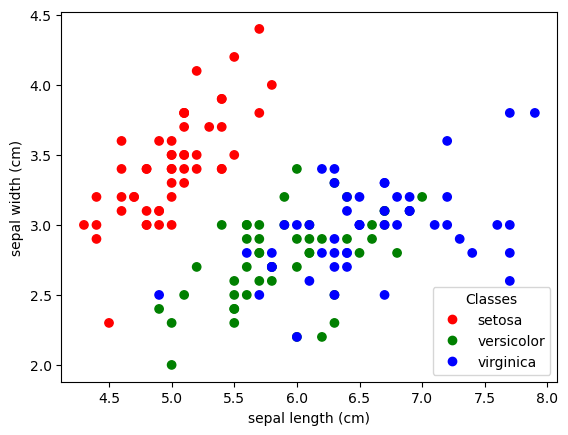

In [4]:
plot2D(feature_x=0, feature_y=1, target = iris.target, colors_on = True, predict_on = False)

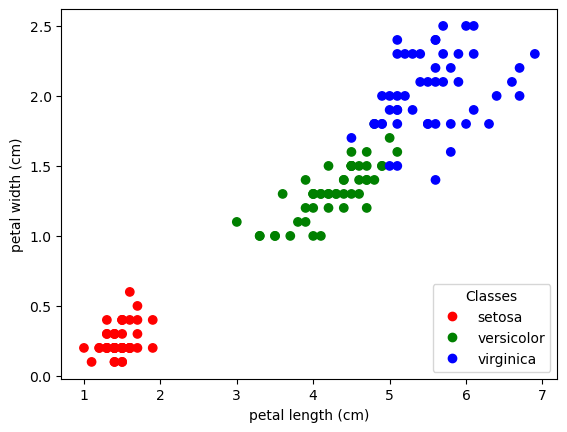

In [5]:
plot2D(feature_x=2, feature_y=3, target = iris.target, colors_on = True, predict_on = False)

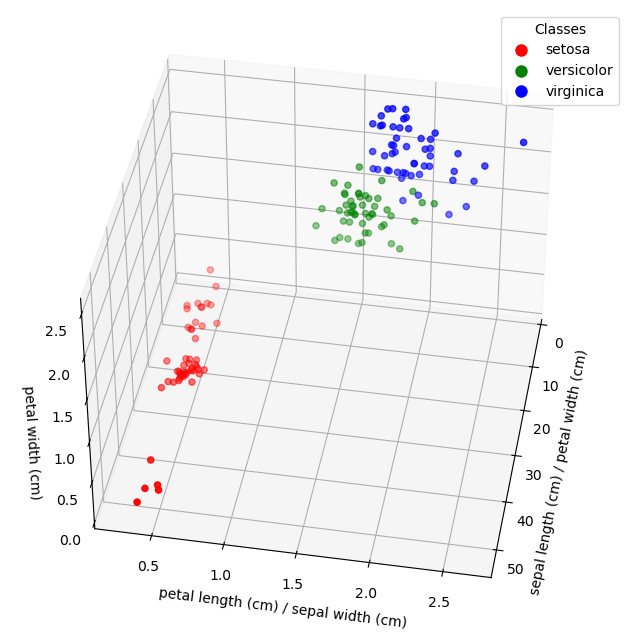

In [6]:
plot3D(feature_x_num = 0, feature_x_den = 3, feature_y_num = 2, feature_y_den = 1, feature_z = 3, target = iris.target, colors_on = True, predict_on = False)

## BIRCH from sklearn

In [ ]:
from sklearn.cluster import Birch

In [ ]:
X = iris.data
y_true = iris.target

birch = Birch(branching_factor=50, threshold=0.5, compute_labels=True)
birch.fit(X)
y_pred = birch.predict(X) # type is numpy.ndarray; y_pred.shape is (150,)

plot2D(feature_x=0, feature_y=1, target = y_pred, colors_on = True, predict_on = True)

In [ ]:
plot3D(feature_x_num = 0, feature_x_den = 3, feature_y_num = 2, feature_y_den = 1, feature_z = 3, target = y_pred, colors_on = True, predict_on = True)

## Implementation of BIRCH

In [11]:
#
# Phase 1: Load into memory by building a CF tree
#

import CFTree_methods

#tree = CFTree_methods.CFTree(branching_factor_B = 4, threshold_T = 0.5, max_num_entries_leafnode_L = 3, distance_metric = CFTree_methods.average_intercluster_distance_D2)
tree = CFTree_methods.CFTree(branching_factor_B = 3, threshold_T = 0.05, max_num_entries_leafnode_L = 2, distance_metric = CFTree_methods.average_intercluster_distance_D2)

for i in range(len(iris.data)):
    tree.insert(iris.data[i])

print("\n\nDISPLAYING CF TREE:\n")
CFTree_methods.display_tree(tree.root)



DISPLAYING CF TREE:

Depth 0: Internal Node:
  N: 150
  LS: [876.5 458.6 563.7 179.9]
  SS: 9539.29

  Child 0:
    Depth 1: Internal Node:
      N: 52
      LS: [260.2 175.8  79.9  14.3]
      SS: 2049.52

      Child 0:
        Depth 2: Internal Node:
          N: 25
          LS: [118.5  76.8  38.7   6.6]
          SS: 873.0400000000001

          Child 0:
            Depth 3: Internal Node:
              N: 5
              LS: [22.  14.4  6.4  1. ]
              SS: 147.22

              Child 0:
                Depth 4: Internal Node:
                  N: 5
                  LS: [22.  14.4  6.4  1. ]
                  SS: 147.22

                  Child 0:
                    Depth 5: Internal Node:
                      N: 1
                      LS: [4.5 2.3 1.3 0.3]
                      SS: 27.32

                      Child 0:
                        Depth 6: Leaf Node:
                          N: 1
                          LS: [4.5 2.3 1.3 0.3]
                          

In [12]:
#
# Phase 3: Global Clustering
#
# Use agglomerative hierarchical clustering algorithm by applying it directly to the subclusters represented by their CF vectors. Use D2 distance metric

# Get the list list_leafnodes of the leafnodes and the list list_subclusters containing all the subclusters (each subcluster is a collection of datapoints)

a_leafnode = tree.get_a_leafnode()
list_leafnodes = []
list_leafnodes.append(a_leafnode)

list_subclusters = []
for subcluster_i in range(len(a_leafnode.CF_list)):
    list_subclusters.append(a_leafnode.CF_list[subcluster_i])

# Get all the prev leafnodes
current_leafnode = a_leafnode
while current_leafnode.pointer_prev is not None:
    current_leafnode = current_leafnode.pointer_prev
    list_leafnodes.append(current_leafnode)
    for subcluster_i in range(len(current_leafnode.CF_list)):
        list_subclusters.append(current_leafnode.CF_list[subcluster_i])
    
# Get all the next leafnodes
current_leafnode = a_leafnode
while current_leafnode.pointer_next is not None:
    current_leafnode = current_leafnode.pointer_next
    list_leafnodes.append(current_leafnode)
    for subcluster_i in range(len(current_leafnode.CF_list)):
        list_subclusters.append(current_leafnode.CF_list[subcluster_i])


In [13]:
num_clusters = 3
list_attributed_cluster = CFTree_methods.hierarchical_clustering(list_subclusters, num_clusters)

In [14]:
import numpy as np

result_clusters = {}
for subcluster_idx, cluster in list_attributed_cluster.items():
    # Initialize list if it doesn't exist for the current cluster
    if cluster not in result_clusters:
        result_clusters[cluster] = []

    # Iterate over datapoints and append to the appropriate cluster
    for datapoint_i in range(len(list_subclusters[subcluster_idx][1].datapoints)):
        result_clusters[cluster].append(list_subclusters[subcluster_idx][1].datapoints[datapoint_i])

# Convert lists to NumPy arrays if needed
for cluster, datapoints in result_clusters.items():
    result_clusters[cluster] = np.array(datapoints)


C:\Users\Gaia\AppData\Local\Temp\ipykernel_17836\16835450.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


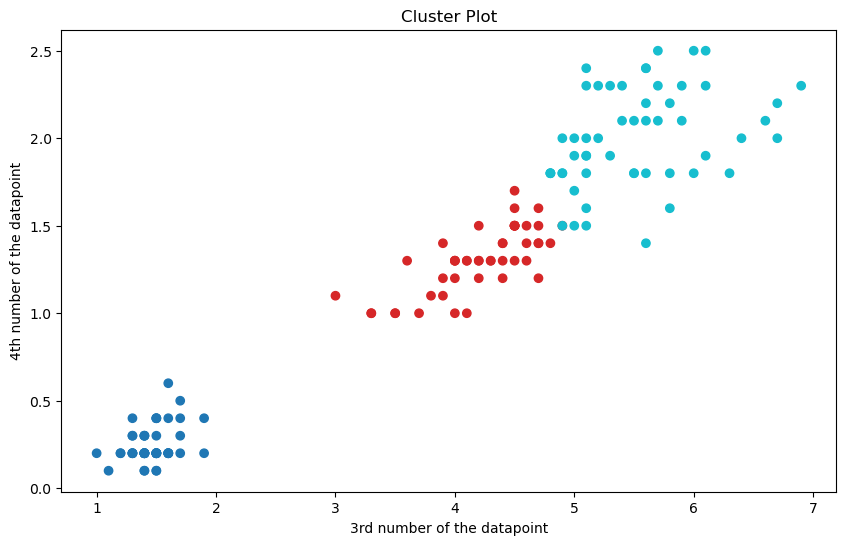

In [15]:
# Initialize empty lists for x and y coordinates
list_data_x = []
list_data_y = []
colors = []

# Define a color map for clusters
color_map = plt.cm.get_cmap('tab10')

# Iterate through the dictionary to extract the third and fourth numbers
for cluster, points in result_clusters.items():
    for point in points:
        list_data_x.append(point[2])
        list_data_y.append(point[3])
        colors.append(cluster)

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(list_data_x, list_data_y, c=colors, cmap=color_map)

# Add labels and title
plt.xlabel('3rd number of the datapoint')
plt.ylabel('4th number of the datapoint')
plt.title('Cluster Plot')

# Show plot
plt.show()
